In [1]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

In [2]:
from pkg.controller.combined_robot import *
from pkg.project_config import *

crob = CombinedRobot(robots_on_scene=[
    RobotConfig(0, RobotType.indy7, ((0.3,-0.4,0), (0,0,np.pi/2)),
                INDY_IP),
    RobotConfig(1, RobotType.panda, ((-0.3,-0.4,0), (0,0,np.pi/2)),
                "{}/{}".format(PANDA_REPEATER_IP, PANDA_ROBOT_IP))]
              , connection_list=[False, False])

connection_list
[False, False]


In [3]:
from pkg.utils.utils import *

In [132]:
trajectory = load_json("traj.json")
trajectory = np.array(trajectory)
trajectory = trajectory[:,6:]

In [146]:
Q_prev = trajectory[0]
V_prev = np.zeros_like(Q_prev)
len_traj = len(trajectory)
start = True
vel_limits = 1.5
acc_limits = 1.5
for i in range(len_traj):
    Qnext = trajectory[i]
    dQ = Qnext - Q_prev
    if np.max(np.abs(dQ)) <= 1e-3:
        continue
    dir_dQ = sign_positive_bias(dQ)
    dQ_abs = dir_dQ*dQ
    V0 = dir_dQ*V_prev
    t_vmax_det = ((V0+vel_limits)/2)
    t_vmax = dQ_abs/(t_vmax_det+(t_vmax_det==0)*1e9)
    t_amax = (np.sqrt(V0**2+2*dQ_abs*acc_limits)-V0)/acc_limits
    t_step = np.max([t_vmax, t_amax])
    
    Acur = (dQ - V_prev*t_step)/(0.5*t_step**2)
    Vcur = V_prev + Acur*t_step
    # check errror
    Q_calc = Q_prev+V_prev*t_step+0.5*Acur*t**2
    assert np.linalg.norm(Qnext-Q_calc)<=1e-3
    V_prev = Vcur


AssertionError: 

In [144]:
import matplotlib.pyplot as plt

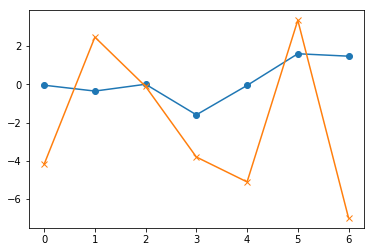

In [147]:
plt.plot(Qnext, '-o')
plt.plot(Q_calc, '-x')

In [93]:
t_vmax

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 2.18428054, 2.21356566, 1.32864198, 0.06414255,
       3.37735617, 0.58145411, 2.56446499])

In [94]:
dQ_abs

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.63821041, 1.66017424, 0.99648149, 0.04810692,
       2.53301713, 0.43609058, 1.92334875])

In [68]:
V0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
dQ_abs

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05146794, 0.03516069, 0.00144566, 0.02750541,
       0.06291016, 0.02183964, 0.10544196])

In [66]:
Amax

array([ 1.5,  1.5,  1.5,  1.5,  1.5,  1.5, -1.5,  1.5, -1.5, -1.5, -1.5,
        1.5, -1.5])

In [63]:
V0**2+2*dQ_abs*Amax

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.15440383,  0.10548208, -0.00433699, -0.08251622,
       -0.18873048,  0.06551891, -0.31632589])

In [40]:
t_vmax

array([       nan,        nan,        nan,        nan,        nan,
              nan, 2.18137204, 2.21061817, 1.32687282, 0.06405714,
       3.37285902, 0.58067987, 2.56105026])

In [35]:
t_amax

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan, 1.48780565, 1.15266733,        nan,
              nan, 0.76253138,        nan])